# ***Predicting Stock Prices with Linear Regression ***

### Stock market forecasting is an attractive application of linear regression. Modern machine learning packages like **scikit**-**learn** make implementing these analyses possible in a few lines of code.

# **Step 1: Importing libraries**

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

## **Step 2: Read in and Explore the data**

In [ ]:
## Read in the Tarin_data set
stock_train = pd.read_csv('Tadawul_stcks.csv')
stock_train

In [ ]:
## Read in the Test_data set
stock_test = pd.read_csv('Tadawul_stcks_23_4.csv')
stock_test

In [ ]:
## Get information of train_Data
stock_train.info()

In [ ]:
## Get information of test_Data
stock_test.info()

In [ ]:
stock_train.shape

In [ ]:
stock_test.shape

In [81]:
## Represent first Five rows in train_data
stock_train.head()

,symbol,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,year,year_date
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.55,35.85,34.90,34.90,-0.40,-1.13,436609.0,15399073.50,804.0,2020,2020
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.65,34.50,35.30,0.25,0.71,737624.0,25981391.35,1268.0,2020,2020
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,34.70,35.15,34.70,35.05,1.05,3.09,489831.0,17116413.40,854.0,2020,2020
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.20,35.65,34.00,34.00,-0.55,-1.59,736157.0,25858700.60,1242.0,2020,2020
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,35.35,35.60,34.25,34.55,-2.05,-5.60,738685.0,25747967.55,383.0,2020,2020


In [ ]:
## Represent first Five rows in test_data
stock_test.head()

In [50]:
#Find the duplicates
stock_train.duplicated().sum()

12

In [ ]:
# Extract duplicate rows
stock_train.loc[stock_train.duplicated(), :]

In [ ]:
# Use keep='last' to keep the last occurrence and drop other duplicates.
stock_train.drop_duplicates(keep='last')

In [60]:
# Remove duplicate rows
stock_train.drop_duplicates(inplace=True)

# **Step 3: Descriptive Statistics**

In [ ]:
# descriptive statistic parameters for the dataset to see the number of null values, datatypes, and memory usage
stock_train.describe()

.

# **Step 4: Prepare the data (Cleaning)**

### **Missing value imputation**


### We will now check for missing values in our dataset. In case there are any missing entries, we will impute them with appropriate values (mode in case of categorical feature, and median or mean in case of numerical feature). We will use the isnull() function for this purpose.

In [ ]:
stock_train.isnull().sum()

In [45]:
stock_train.dropna(inplace = True)
stock_test.dropna(inplace = True)

In [ ]:
stock_train.open[stock_train.open>47.0]= stock_train.open.median()

In [ ]:
stock_train.describe()

In [17]:
stock_train['date'] =  pd.to_datetime(stock_train['date'])

In [ ]:
stock_train.info()

In [19]:
stock_train['year'] = pd. DatetimeIndex(stock_train['date']). year

In [20]:
stock_train['date'] = pd.to_datetime(stock_train['date'])
stock_train['year_date'] = stock_train['date'].dt.year

stock_test['date'] = pd.to_datetime(stock_test['date'])
stock_test['year_date'] = stock_test['date'].dt.year

stock_train.drop([ 'date'], axis='columns', inplace=True)
stock_test.drop([ 'date'], axis='columns', inplace=True)

In [ ]:
stock_test.head()

In [ ]:
stock_train.high[stock_train.high>50]= stock_train.high.median()

In [ ]:
stock_train.low[stock_train.low>47.0]= stock_train.low.median()

In [ ]:
stock_train.close[stock_train.close>55]= stock_train.close.median()

In [ ]:
stock_train.change[stock_train.change>50]= stock_train.close.median()

In [ ]:
stock_train.change[stock_train.change<-50]= stock_train.close.median()

In [ ]:
stock_train.perc_Change[stock_train.perc_Change>99.9]= stock_train.perc_Change.median()
stock_train.perc_Change[stock_train.perc_Change<-99.9]= stock_train.perc_Change.median()

In [28]:
stock_train.columns = stock_train.columns.str.replace(' ', '')

In [ ]:
stock_train.no_trades[stock_train.no_trades>1500]= stock_train.no_trades.median()

In [ ]:
stock_train.describe()

In [ ]:
stock_train.hist(edgecolor='red', linewidth=1.2, figsize=(11, 11));

.

# **Step 5: Data Visualization**

### using Graphical representation to visualize the unique values present in the data. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


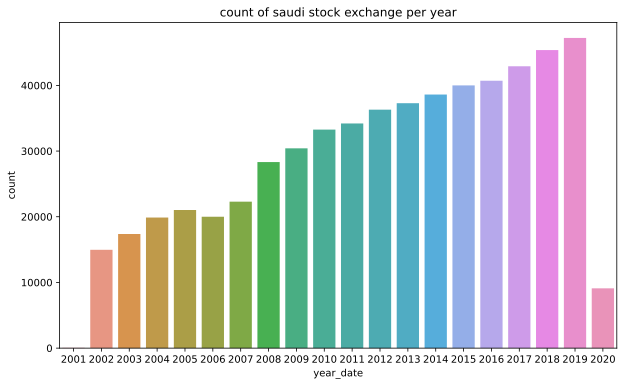

In [93]:
plt.figure(figsize=(10, 6))
plt.title('count of saudi stock exchange per year')
sns.countplot(stock_train['year_date']);

## **1.	Which sector is the most profitable?**

In [ ]:
plt.subplots(figsize=(25,5))
plt.title('The most profitable sector', fontsize = 20)
sns.barplot(x = 'sectoer',y='close',data=stock_train,palette = sns.color_palette("husl", 11));
sns.despine();

.

## **2. What is the most valuable year in the Saudi stock market?**

In [ ]:
a=stock_train.groupby(['year'])[['high']].sum().sort_values('high', ascending=False)
a

In [ ]:
plt.figure(figsize=[12,6]);
plt.bar(a.index,a.high);
plt.title('the most valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('high',fontsize=20,color='black',family='serif');

.

## **3. What is the lowiest valuable year in the Saudi stock market?**

In [ ]:
b=stock_train.groupby(['year'])[['low']].sum().sort_values('low')
b

In [ ]:
plt.figure(figsize=[12,6]);
plt.bar(b.index,b.low);
plt.title('the less valuable year in the Saudi stock market',fontsize=30,color='black',family='serif');
plt.xlabel('year',fontsize=20,color='black',family='serif');
plt.ylabel('low',fontsize=20,color='black',family='serif');

.

## **4. What is the percentage change in the sector,and what is the highest sector?**

In [ ]:
c=stock_train.groupby(['sectoer'])[['perc_Change']].max().sort_values('perc_Change', ascending=False)
c 

In [ ]:
plt.figure(figsize=[12,6]);
plt.bar(c.index,c.perc_Change);
plt.title('percentage change in the sector',fontsize=30,color='black',family='serif');
plt.xlabel('sectoer',fontsize=20,color='black',family='serif');
plt.ylabel('perc_Change',fontsize=20,color='black',family='serif');
plt.xticks(rotation=45)

.

.

# **Step 6: Correlation Plot**

In [ ]:
# Represent the correlation between the features. 
plt.figure(figsize=(8,8))
sns.heatmap(stock_train.corr(), vmax = 1, vmin = -1, cmap = 'twilight', cbar=True, annot=True, square=True, fmt='.2f', annot_kws = {'size': 10});

.

.

# **Step 7: Linear Regression**

**7.1 Fit a linear regression model on the train data set**

In [157]:
#Separate our features from our target

x = stock_train.loc[:,['open', 'high', 'low', 'change',]]
y = stock_test['close']

In [ ]:
x.head()

In [167]:
#Create a validation set
stock_train, stock_val = train_test_split(stock_train, test_size=0.25, random_state=10)

In [169]:
# Scor on stock_validation set
re.score(stock_val[['open', 'high', 'low', 'change']], stock_val['close'])

0.8174856906578243

In [127]:
# Scor on stock_test set
re.score(stock_test[['open','high', 'low', 'change']], stock_test['close'])

0.9955208715139056

In [168]:
# Fit a simple linear regression on training set
re = LinearRegression()
re.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

LinearRegression()

.

**7.2 Normalizing the Data**

In [ ]:
#Scale the data to be between 0 and 1
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

.

**7.3 Random Forest Model Evaluation**

In [ ]:
 # Import Decision Tree Classifier
dt = DecisionTreeRegressor()
dt.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(stock_train[['open','high', 'low', 'change']], stock_train['close'])

In [121]:
rf.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8507894602344145

In [124]:
dt.score(stock_train[['open', 'high', 'low', 'change']], stock_train['close'])

0.8508508818306785

In [125]:
dt.score(stock_test[['open','high', 'low', 'change']], stock_test['close'])

0.6870672387573805

Train and test are close, so no overfitting and no outliers

**7.4 R-squared**

In [130]:
# Compare the actual y values in the training set with the predicted values
actual_train = stock_train['close']
predicted_train = re.predict(stock_train[['open','high', 'low', 'change']])
predicted_train.shape

(579419,)

In [131]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(actual_train, predicted_train))

4.752703921760845

In [132]:
# Compare the actual y values in the test set with the predicted values
actual_test = stock_test['close']
predicted_test = re.predict(stock_test[['open','high', 'low', 'change']])
predicted_test.shape

(6830,)